In [12]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler# 0 MEAN AND 1 STANDARD DEVIATION 
from sklearn.decomposition import PCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

features = [
    
    #'Channel', categorical values 
    #'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [13]:
df = pd.read_csv('data_processed.csv', index_col = 0)

In [14]:
data = df[features].to_numpy()
data.shape

# it is 6 dimensional space as a human we cant visualize the six dimwnsional space now 
# so we have to compress it down  into 2 dimension 

(440, 6)

In [15]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:,0].std()

1.0

In [16]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [17]:
np.save('training_data.npy', data)

In [20]:
pca = PCA(n_components = 2)
res_pca = pca.fit_transform(data)

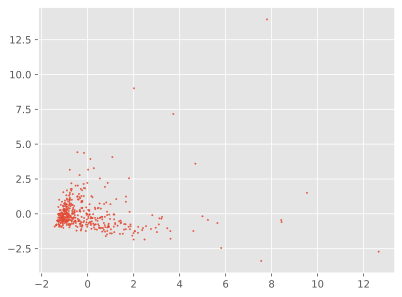

In [22]:
plt.scatter(res_pca[:,0], res_pca[:,1], s=2, alpha  = 0.9)

In [9]:
features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

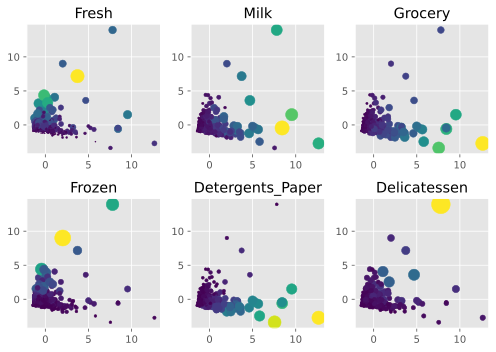

In [10]:
fig, axes = plt.subplots(2, 3, figsize =(7, 5))

for feature, ax in zip (features , axes.ravel()):
    cmap='viridis'
    sizes = 20+20*data[:, features.index(feature)]
    cols = df[feature]
    ax.scatter(res_pca[:,0], res_pca[:,1], s = sizes , c= cols , cmap = cmap)
    ax.set_title(feature)
    
plt.tight_layout()   

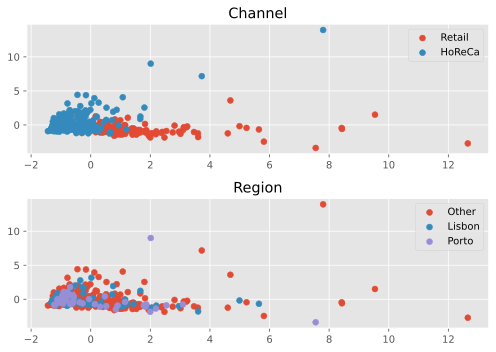

In [11]:
fig , axes= plt.subplots(2,1, figsize = (7, 5))

for feature, ax in zip(['Channel','Region'], axes.ravel()):
    cmap = 'Pastel1'
    size = 20
    for unique_val in df[feature].unique():
        ax.scatter(
            res_pca[df[feature]== unique_val, 0],
            res_pca[df[feature]== unique_val, 1],
            label = unique_val
        )
        ax.set_title(feature)
    ax.legend()
plt.tight_layout()
        